In [1]:
#import danych
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
import pandas as pd
import numpy as np
dane = load_breast_cancer( as_frame = True)
#dane
dane

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [2]:
from matplotlib import pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
#tablica z cechami pacjentek
feature_set = dane['data']
feature_set

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
#tablica z cechami pacjentek
feature_set = dane['data']
feature_set
#tablica z etykietami pacjentek złośliwy, łagodny
labels2 = dane['target']
labels2
#nazwy cech
feature_names=dane['feature_names']
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

***2. Dzielenie zbioru na train i test***

In [6]:
#zapisujemy tablice cech jako tablice np.array
X = feature_set.to_numpy()
X = np.array(X)
X = X.astype(float)
print("Kształt tablicy:",X.shape)
print("\nZawartość tablicy X:\n\n",X)
#przeskalowanie danych
X_avg = np.average(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_avg) / X_std
print("\nPrzeskalowane dane: \n\n",X_scaled)
#zapisujemy tablice etykiet jako tablice np.array
y = labels2.to_numpy()
y = np.array(y)
y = y.astype(float)
print("Kształt tablicy:",y.shape)
print("\nZawartość tablicy Y:\n\n",y)
inputs, feature_set_test, labels, labels_test = train_test_split(X_scaled, y, test_size=0.15, random_state=989)

Kształt tablicy: (569, 30)

Zawartość tablicy X:

 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

Przeskalowane dane: 

 [[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
Kształt tablicy: (569,)

Za

In [7]:
print(inputs.shape)
print(labels.shape)
print(feature_set_test.shape)
print(labels_test.shape)

(483, 30)
(483,)
(86, 30)
(86,)


In [8]:
#Zmiana ksztaltu labels i labels_test
labels = np.reshape(labels,(483,1))
labels_test = np.reshape(labels_test,(86,1))

In [9]:
print(inputs.shape)
print(labels.shape)
print(feature_set_test.shape)
print(labels_test.shape)

(483, 30)
(483, 1)
(86, 30)
(86, 1)


***Definicje funkcji***

In [10]:
class Sigmoid_layer:
  def __init__(self, number_of_input_nodes, number_of_neurons):
    self.weights = np.random.randn(number_of_input_nodes, number_of_neurons )
    self.biases = np.random.randn(1,number_of_neurons)


  def forward_prop(self, input_data):
    self.orig_input = input_data
    self.input_data = input_data #to be used in backprop

    self.XW_B = np.dot(self.input_data, self.weights) + self.biases
    self.output_val = sigmoid(self.XW_B)
    return self.output_val

  def back_prop(self, gradient, learning_rate):
    #gradients with respect to out (z)
    dlayer_dz = gradient.copy()
    layer_activation_der = sigmoid_der(self.XW_B)

    #gradients of totals against weights/biases/input
    dXW_B_dw = self.input_data
    dXW_B_db = 1


    dXWB__dinputs = self.weights


    dLayer_dweights = self.input_data.T @ (gradient * layer_activation_der)
    dLayer_dbiases =  np.sum((gradient * layer_activation_der),axis=0)


    self.weights -= learning_rate * dLayer_dweights
    self.biases -= learning_rate * dLayer_dbiases


    dLayer_dinputs = (gradient * layer_activation_der) @ self.weights.T


    return dLayer_dinputs

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [12]:
def Cross_Entropy(y_hat,y):
  return 1/y_hat.shape[0]*np.sum( -1*((y>0) * np.log(y_hat))-1*(y==0)* np.log(1-y_hat))


def derivative_Cross_Entropy(y_hat,y):
  return -1*((y>0) / y_hat)+((y==0) / (1-y_hat))

In [13]:
#utworzenie warstw
sigmoid_layer1 = Sigmoid_layer(30, 5)
sigmoid_layer2 = Sigmoid_layer(5, 3)
sigmoid_layer3 = Sigmoid_layer(3, 1)

#lista do przechowywania wartosci funkcji kosztu dla zbioru train
Jtrain_values=[ ]

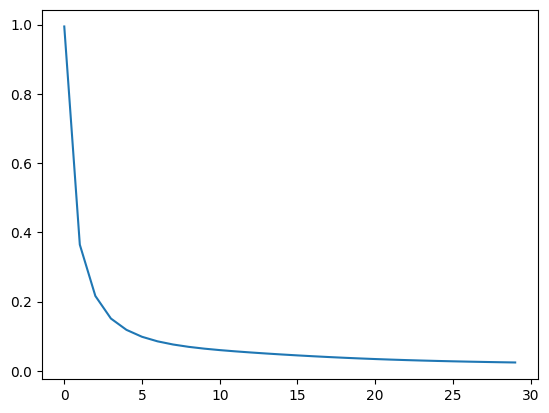

In [14]:
learning_rate = 0.0005

for iteration in range(3000):
  #FORWARD
  output = sigmoid_layer1.forward_prop(inputs)
  output = sigmoid_layer2.forward_prop(output)
  output = sigmoid_layer3.forward_prop(output)

  if (iteration % 100) ==0:
    J = Cross_Entropy(output, labels)
    Jtrain_values.append(J)




  #BACKWARD
  dJ_dout = derivative_Cross_Entropy(output, labels)

  gradient = sigmoid_layer3.back_prop(dJ_dout, learning_rate)
  gradient = sigmoid_layer2.back_prop(gradient, learning_rate)
  gradient = sigmoid_layer1.back_prop(gradient, learning_rate)


plt.plot(Jtrain_values)


Text(0.5, 1.0, 'Funkcja kosztu')

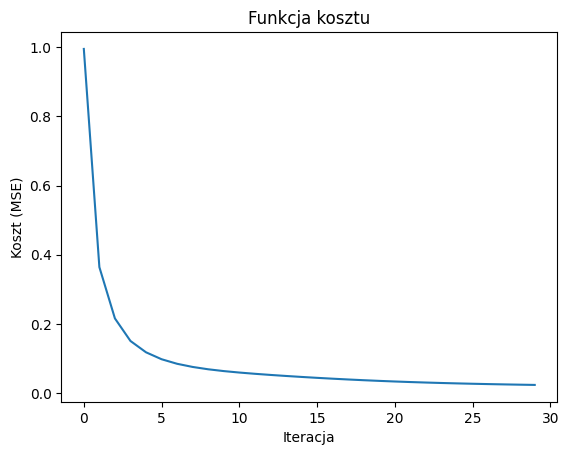

In [15]:
plt.xlabel('Iteracja')
plt.ylabel('Koszt (MSE)')
plt.plot(Jtrain_values)
plt.title('Funkcja kosztu')

In [16]:
output = sigmoid_layer1.forward_prop(feature_set_test)
output = sigmoid_layer2.forward_prop(output)
output_predicted = sigmoid_layer3.forward_prop(output)
print(output_predicted)

[[0.00544357]
 [0.93517882]
 [0.99779777]
 [0.00563148]
 [0.99362239]
 [0.00491019]
 [0.00536779]
 [0.99793396]
 [0.99648433]
 [0.99815293]
 [0.9977031 ]
 [0.99107028]
 [0.99766515]
 [0.99762532]
 [0.00569801]
 [0.00501957]
 [0.00969741]
 [0.99784998]
 [0.99786538]
 [0.00571136]
 [0.00555225]
 [0.98971854]
 [0.0056702 ]
 [0.13611234]
 [0.9978284 ]
 [0.99523587]
 [0.99779877]
 [0.99434996]
 [0.99807461]
 [0.92688883]
 [0.00503575]
 [0.96144796]
 [0.99810192]
 [0.99779864]
 [0.00557714]
 [0.99793621]
 [0.99383678]
 [0.99320701]
 [0.99788186]
 [0.00584129]
 [0.99800238]
 [0.99546543]
 [0.99773379]
 [0.00577078]
 [0.99129136]
 [0.00595331]
 [0.99779756]
 [0.00705709]
 [0.99788402]
 [0.00997819]
 [0.99370197]
 [0.99725083]
 [0.99741193]
 [0.99677188]
 [0.00601813]
 [0.00507096]
 [0.00489997]
 [0.00565452]
 [0.98287847]
 [0.56129015]
 [0.00646419]
 [0.00576062]
 [0.98639285]
 [0.00663116]
 [0.00566012]
 [0.99294359]
 [0.99789419]
 [0.99812665]
 [0.99766907]
 [0.00489922]
 [0.03287201]
 [0.00

In [17]:
prediction = (output_predicted>0.5)
print(prediction)

[[False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]]


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, prediction)

0.9651162790697675

In [19]:
from sklearn.metrics import confusion_matrix


tn, fp, fn, tp = confusion_matrix(labels_test, prediction).ravel()
sensitivity = tp / (tp+fn)
print(sensitivity )

1.0


In [20]:
from sklearn.metrics import accuracy_score
confusion_matrix(labels_test, prediction)

array([[33,  3],
       [ 0, 50]])

***Drzewo decyzyjne***

In [22]:
# Załadowanie bibliotek
import pandas as pd
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [23]:
#tablica z cechami pacjentek
feature_set = dane['data']
feature_set
#tablica z etykietami pacjentek złośliwy, łagodny
labels2 = dane['target']
labels2
#nazwy cech
feature_names=dane['feature_names']
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
feature_set

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
labels2

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [26]:
# Dzielenie danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(feature_set, labels2, test_size=0.4, random_state=525)
# 60% training and 40% test

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(341, 30)
(341,)
(228, 30)
(228,)


In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=6)


# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [29]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9035087719298246


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 72,  10],
       [ 12, 134]])

In [31]:
!pip install graphviz


!pip install pydotplus


!pip install six

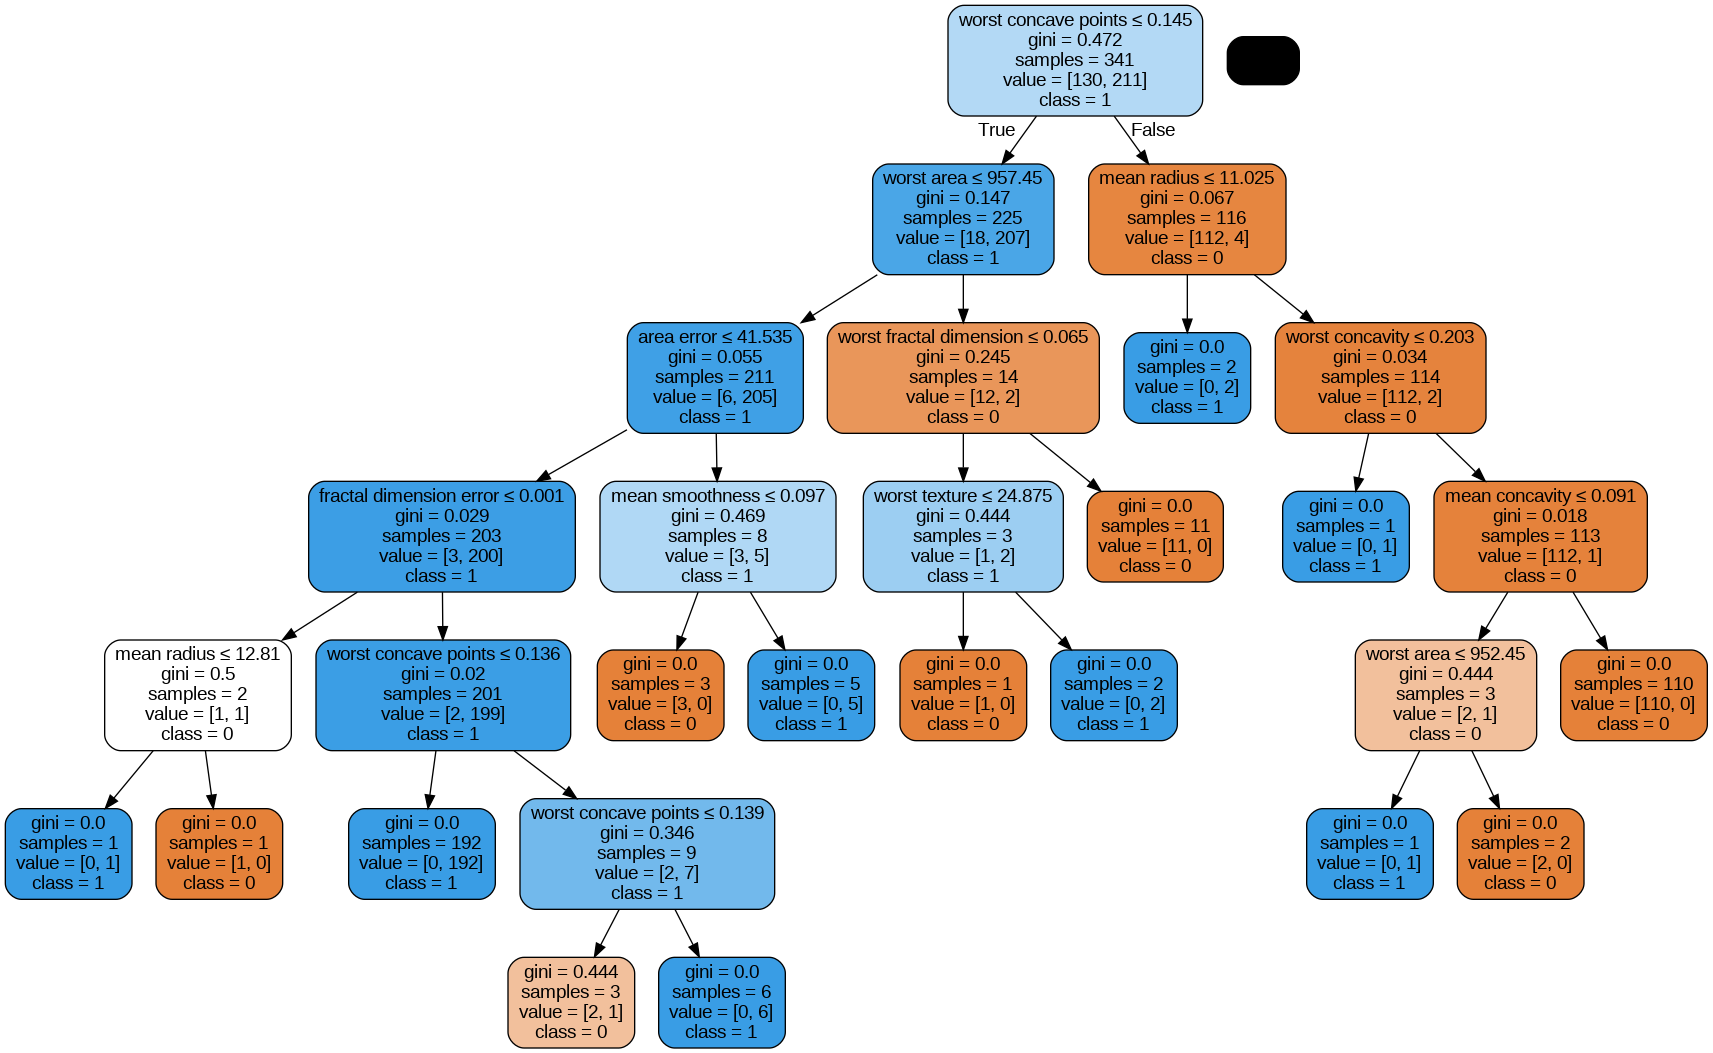

In [32]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())